# Objectives of the Analysis

The goal of this analysis is to identify where employee satisfaction is weakest across markets and understand what drives lower ratings.
Using employee review data, the study aims to provide a data-driven foundation for a focused improvement plan that can deliver measurable results within six months.

Specifically, this analysis seeks to:

- Measure global performance:
Establish the overall average satisfaction rating and distribution of scores across all countries.

- Identify low-performing markets:
Detect which countries score significantly below the global average and have large enough sample sizes (n ≥ 50) to ensure reliable insights.

- Understand key pain points:
Within the lowest-performing countries, analyze how ratings vary




##1/ Importing and starting with the observation step:
### A. validate the import, see shapes, dtypes, and a sample.

**Key concepts:** *shape*, *index*, *columns*.

In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
#uploaded = files.upload()


df = pd.read_csv("merged_data_pwc_deteriorated.csv", encoding='utf-8', low_memory=False)


In [203]:
df

,Unnamed: 0,date,location,position,rating,employee_type,title,pros,cons,Recommander,Approbation du PDG,Perspective commerciale
0,0,19 avr. 2022,Sydney,Employé anonyme,"2,0",Ancien employé,Toxic culture,Nice office and good benefits,"Toxic culture, under paid, lack of recognition.",negativeStyles,noDataStyles,noDataStyles
1,1,29 déc. 2021,"Islâmâbâd,",Associate Consultant,"3,0","Ancien employé, plus d'un an",PwC Pakistan - Technology Advisory (Islamabad),"Good exposure, average compensation, good team...","Unprofessional work culture, severe lack of di...",positiveStyles,positiveStyles,negativeStyles
2,2,29 mars 2022,Singapour,Director,"4,0","Employé actuel, plus de 3&nbsp;ans",good balanced career,Good network; Average work life balance amongs...,Pay not competitive; Senior management only pa...,NaN,noDataStyles,noDataStyles
3,3,12 avr. 2022,"Dublin, Dublin",Senior Manager IT,"4,0","Employé actuel, plus de 3&nbsp;ans",Good work life balance,"good culture, supportive people &amp; leadership",Lower salary compared to industry,noDataStyles,noDataStyles,noDataStyles
4,4,12 avr. 2022,Kuala Lumpur,Senior Manager,"5,0",Employé actuel,Pros &amp; Cons,Flexible working hours and workspace,Heavy workload and long working hours,noDataStyles,NaN,noDataStyles
...,...,...,...,...,...,...,...,...,...,...,...,...
43447,43447,20 févr. 2023,"New York, NY",AML Analyst,"4,0",Ancien intérimaire,Work,Laptop. Solid Team. Industry Standard working,You do what you need to do. That's it.,noDataStyles,noDataStyles,noDataStyles
43448,43448,21 févr. 2023,Jakarta,Assurance Associate,"5,0","Ancien employé, plus d'un an",great experience,improve your accounting skills and teamwork,bad work-life balance especially in peak season,positiveStyles,positiveStyles,positiveStyles
43449,43449,21 févr. 2023,Singapour,Associate,"4,0",Employé actuel,Fresh Graduate Experience,good coaching culture with coaching manager an...,no fixed workplace but flexible,NaN,noDataStyles,noDataStyles
43450,43450,28 févr. 2023,"Chicago, IL",Senior Associate,"3,0",Employé actuel,Decent,Great enviornment to be in,Too long of hours to work,noDataStyles,noDataStyles,noDataStyles


In [204]:
# ============================================================
# 2) First look (sanity checks)
# ============================================================
print("\n==== Shape / Columns ====")
print(df.shape)
print(df.columns.tolist())

print("\n==== Info ====")
df.info()

print("\n==== Sample(5) ====")
display(df.sample(min(5, len(df)), random_state=0))


==== Shape / Columns ====
(43452, 12)
['Unnamed: 0', 'date', 'location', 'position', 'rating', 'employee_type', 'title', 'pros', 'cons', 'Recommander', 'Approbation du PDG', 'Perspective commerciale']

==== Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43452 entries, 0 to 43451
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               43452 non-null  int64 
 1   date                     43452 non-null  object
 2   location                 43452 non-null  object
 3   position                 43447 non-null  object
 4   rating                   43452 non-null  object
 5   employee_type            43452 non-null  object
 6   title                    43117 non-null  object
 7   pros                     34762 non-null  object
 8   cons                     43452 non-null  object
 9   Recommander              30663 non-null  object
 10  Approbation du PDG       39107 n

,Unnamed: 0,date,location,position,rating,employee_type,title,pros,cons,Recommander,Approbation du PDG,Perspective commerciale
43056,43056,12 mars 2023,Mumbai,Consultant,"3,0","Employé actuel, plus d'un an",Good work,Good work can do sometimes get interesting,"Repetitive , low pay no perks",negativeStyles,positiveStyles,positiveStyles
2574,2574,25 juil. 2022,"New York, NY",Advance Internship,"5,0","Ancien stagiaire, moins d'un an",Overall great experience!,NaN,At the time of my internship it was fully virt...,positiveStyles,noDataStyles,positiveStyles
32594,32594,18 mars 2016,Lagos,Senior Associate - Advisory,"4,0",Ancien employé,Work ethics and culture,NaN,Career growth in PwC is heavily skewed in favo...,positiveStyles,positiveStyles,positiveStyles
33176,33176,6 juin 2015,"Dallas, TX",Consultant,"1,0","Employé actuel, plus d'un an",Not a Great Place for Consulting,Opportunities to build relationships with clie...,Extensive Travel; As with all consulting firms...,NaN,NaN,positiveStyles
25815,25815,21 mai 2021,"Pasig, Rizal",Experienced Audit Associate,"3,0",Employé actuel,"no work life balance, less compensation more work",NaN,"no work life balance, less compensation more work",noDataStyles,noDataStyles,noDataStyles


In [205]:
df.tail()

,Unnamed: 0,date,location,position,rating,employee_type,title,pros,cons,Recommander,Approbation du PDG,Perspective commerciale
43447,43447,20 févr. 2023,"New York, NY",AML Analyst,"4,0",Ancien intérimaire,Work,Laptop. Solid Team. Industry Standard working,You do what you need to do. That's it.,noDataStyles,noDataStyles,noDataStyles
43448,43448,21 févr. 2023,Jakarta,Assurance Associate,"5,0","Ancien employé, plus d'un an",great experience,improve your accounting skills and teamwork,bad work-life balance especially in peak season,positiveStyles,positiveStyles,positiveStyles
43449,43449,21 févr. 2023,Singapour,Associate,"4,0",Employé actuel,Fresh Graduate Experience,good coaching culture with coaching manager an...,no fixed workplace but flexible,NaN,noDataStyles,noDataStyles
43450,43450,28 févr. 2023,"Chicago, IL",Senior Associate,"3,0",Employé actuel,Decent,Great enviornment to be in,Too long of hours to work,noDataStyles,noDataStyles,noDataStyles
43451,43451,28 févr. 2023,Hong Kong,Management Trainee,"4,0",Employé actuel,NaN,Standard work environment and pace,confused structure and program design,noDataStyles,noDataStyles,noDataStyles


In [206]:
df.dtypes

,0
Unnamed: 0,int64
date,object
location,object
position,object
rating,object
employee_type,object
title,object
pros,object
cons,object
Recommander,object


In [207]:
df.describe()

,Unnamed: 0
count,43452.000000
mean,21725.500000
std,12543.656285
min,0.000000
25%,10862.750000
50%,21725.500000
75%,32588.250000
max,43451.000000


"""end of observation"""


### B. Search for constant values



In [208]:

df.nunique(dropna=False)


,0
Unnamed: 0,43452
date,5030
location,1194
position,4186
rating,7
employee_type,48
title,23344
pros,34360
cons,42343
Recommander,5


### C . quick overview

- Unnamed: 0 → 43 452 uniques
Every row has a unique value → it’s just an index column. Drop it.

- date → 5 030 uniques
Many distinct dates. Good for timelines. Make sure it’s parsed to datetime.

- location → 1 194 uniques
High cardinality (many different “city, country” strings). Expect inconsistent formats.
Action: split into city and country, normalize.

- position → 4 186 uniques
Extremely high cardinality (free-text titles).
Action: map to a small set like Intern / Associate / Senior Associate / Manager / Senior Manager / Director / Partner.

- rating → 7 uniques
You probably have 1–5 (or 0–5) plus extra tokens (NaN, maybe “noDataStyles”).
Action: convert to float (replace “4,0”→4.0) and keep within 1–5.

- employee_type → 48 uniques
Likely phrases like “Employé actuel, plus de 3 ans…”.
Action: extract employee_status = Employé actuel / Ancien employé.

- title → 23 344 uniques, pros → 34 360, cons → 42 343
- Free text → almost every row is unique.
Action: don’t group on these raw; use derived features (e.g., text length, sentiment, keywords).

- Recommander → 5, Approbation du PDG → 5, Perspective commerciale → 4
These are the “positiveStyles / negativeStyles / noDataStyles …” style labels.
Action: map to binary 1 (positive) / 0 (negative) and keep NaN for “no data”.

In [209]:
# # Detect columns with a constant value:
colm = df.nunique(dropna=False) == 1
colm

,0
Unnamed: 0,False
date,False
location,False
position,False
rating,False
employee_type,False
title,False
pros,False
cons,False
Recommander,False


this means that there no constant values in the columns, nothing to drop

In [210]:
# Drop these constant columns
dup_cols = df.T.duplicated()
dup_cols

,0
Unnamed: 0,False
date,False
location,False
position,False
rating,False
employee_type,False
title,False
pros,False
cons,False
Recommander,False


this means there are no duplicates, so nothing to drop

In [211]:
# Import package for missing values analysis

import missingno

<Axes: >

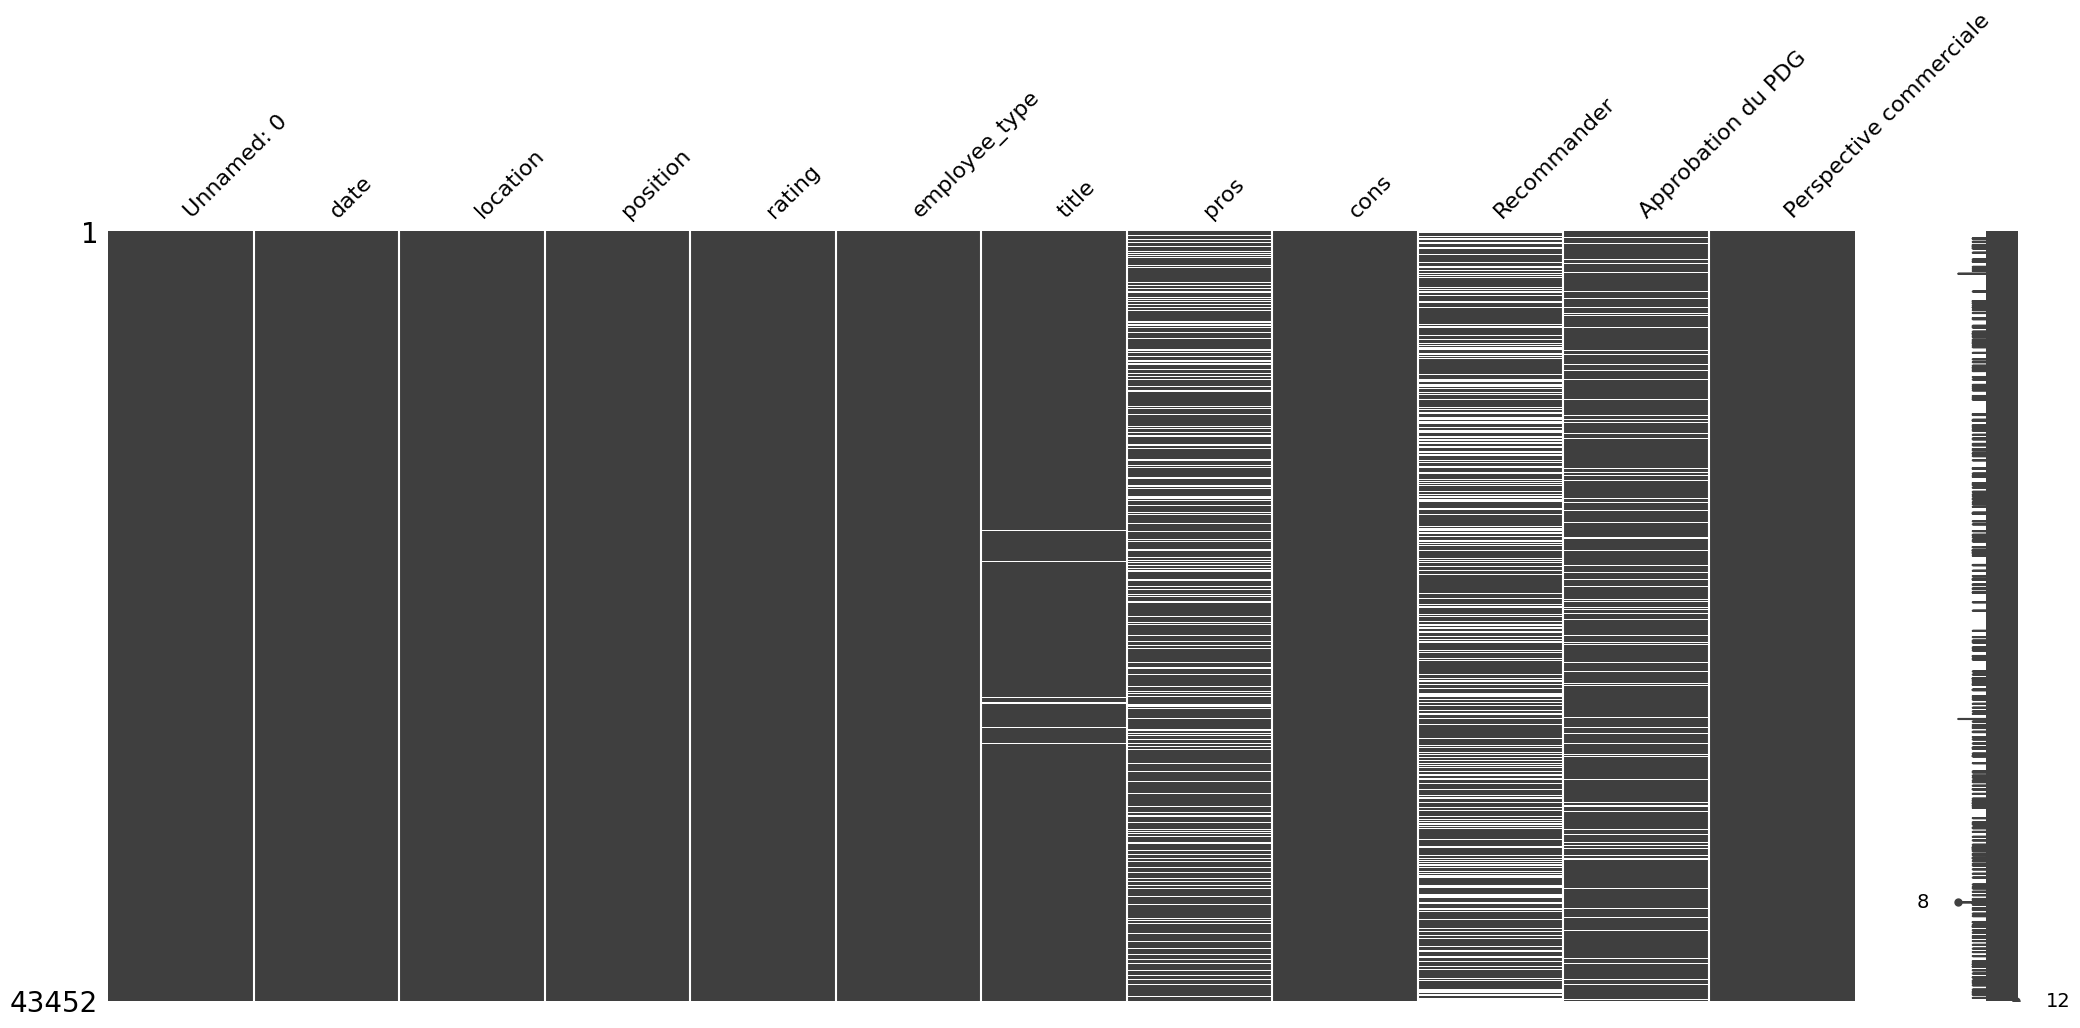

In [212]:
missingno.matrix(df)

In [213]:
# See which columns have only NA values

df.isna().all()

,0
Unnamed: 0,False
date,False
location,False
position,False
rating,False
employee_type,False
title,False
pros,False
cons,False
Recommander,False


no columns with a 100% Missing values

In [214]:
# looking for columns with an excessive rate of missing values
df.isna().mean()

,0
Unnamed: 0,0.000000
date,0.000000
location,0.000000
position,0.000115
rating,0.000000
employee_type,0.000000
title,0.007710
pros,0.199991
cons,0.000000
Recommander,0.294325


In [215]:
# Create a mask for columns with more than 50% of NAs

excessive_na = df.isna().mean() > .5
excessive_na

,0
Unnamed: 0,False
date,False
location,False
position,False
rating,False
employee_type,False
title,False
pros,False
cons,False
Recommander,False


Note. We can’t compute correlations yet because several columns still have the wrong data types (text instead of numeric/categorical). Right now, we will:

- Fix dtypes (e.g., convert rating to float, encoded flags to Int64, dates to datetime, categories to category).

- Measure missing values for each column (how many and where).

- Make basic plots: histograms/boxplots for numeric columns and bar charts for categorical ones.

#  2/ Light Feature Engineering

## A. Dropping the index column

In [216]:
copy_df = df.copy()

In [217]:
copy_df = copy_df.drop(columns=['Unnamed: 0'], errors='ignore')
copy_df

,date,location,position,rating,employee_type,title,pros,cons,Recommander,Approbation du PDG,Perspective commerciale
0,19 avr. 2022,Sydney,Employé anonyme,"2,0",Ancien employé,Toxic culture,Nice office and good benefits,"Toxic culture, under paid, lack of recognition.",negativeStyles,noDataStyles,noDataStyles
1,29 déc. 2021,"Islâmâbâd,",Associate Consultant,"3,0","Ancien employé, plus d'un an",PwC Pakistan - Technology Advisory (Islamabad),"Good exposure, average compensation, good team...","Unprofessional work culture, severe lack of di...",positiveStyles,positiveStyles,negativeStyles
2,29 mars 2022,Singapour,Director,"4,0","Employé actuel, plus de 3&nbsp;ans",good balanced career,Good network; Average work life balance amongs...,Pay not competitive; Senior management only pa...,NaN,noDataStyles,noDataStyles
3,12 avr. 2022,"Dublin, Dublin",Senior Manager IT,"4,0","Employé actuel, plus de 3&nbsp;ans",Good work life balance,"good culture, supportive people &amp; leadership",Lower salary compared to industry,noDataStyles,noDataStyles,noDataStyles
4,12 avr. 2022,Kuala Lumpur,Senior Manager,"5,0",Employé actuel,Pros &amp; Cons,Flexible working hours and workspace,Heavy workload and long working hours,noDataStyles,NaN,noDataStyles
...,...,...,...,...,...,...,...,...,...,...,...
43447,20 févr. 2023,"New York, NY",AML Analyst,"4,0",Ancien intérimaire,Work,Laptop. Solid Team. Industry Standard working,You do what you need to do. That's it.,noDataStyles,noDataStyles,noDataStyles
43448,21 févr. 2023,Jakarta,Assurance Associate,"5,0","Ancien employé, plus d'un an",great experience,improve your accounting skills and teamwork,bad work-life balance especially in peak season,positiveStyles,positiveStyles,positiveStyles
43449,21 févr. 2023,Singapour,Associate,"4,0",Employé actuel,Fresh Graduate Experience,good coaching culture with coaching manager an...,no fixed workplace but flexible,NaN,noDataStyles,noDataStyles
43450,28 févr. 2023,"Chicago, IL",Senior Associate,"3,0",Employé actuel,Decent,Great enviornment to be in,Too long of hours to work,noDataStyles,noDataStyles,noDataStyles


## B. Convert Date to to dtype Datetime

In [218]:
# create a dict to change the months

fr_to_en = {
    'janv.':'Jan', 'févr.':'Feb', 'mars':'Mar', 'avr.':'Apr', 'mai':'May', 'juin':'Jun',
    'juil.':'Jul', 'août':'Aug', 'sept.':'Sep', 'oct.':'Oct', 'nov.':'Nov', 'déc.':'Dec'
}

s = copy_df['date'].astype(str).replace(fr_to_en, regex=True) #turns the date into a text to remplace safely and
# finds and replace th french months everywhre inside the strings (regex=true matchs the substrings)
copy_df['date'] = pd.to_datetime(s)   #convert the cleaned strings to real datetime objects
copy_df['date'].dtype, copy_df['date'].head()

(dtype('<M8[ns]'),
 0   2022-04-19
 1   2021-12-29
 2   2022-03-29
 3   2022-04-12
 4   2022-04-12
 Name: date, dtype: datetime64[ns])

In [219]:
copy_df['date'].head(10)


,date
0,2022-04-19
1,2021-12-29
2,2022-03-29
3,2022-04-12
4,2022-04-12
5,2022-04-15
6,2022-01-12
7,2022-04-19
8,2022-03-10
9,2022-04-05


## C. Convert location to Country

🎯 Objective

We start with a messy free-text column location (e.g., “Chicago, IL”, “Dublin, Dublin”, “Kuala Lumpur, Malaysia”, “Islamâbâd, Pakistan”).
My goal is to derive a clean, standardized country for each row without external APIs, so the pipeline is fast, reproducible, and auditable.

🧩 Key idea

Most corporate locations are written as City, State/Province, Country or City, Country.
So I:

Extract the last token after the final comma (often a country, sometimes a region/state).

Map that token to a country using a small set of transparent rules and lookup lists.

This approach is deterministic and easy to maintain: if a new case appears, I just add one line to a dictionary.

🔁 Processing flow (priority order)

For each row:

- Last token extraction:
    Take the substring after the final comma in location. Trim spaces and normalize non-breaking spaces.

Example:

“Chicago, IL” → IL

“Sydney, NSW” → NSW

“Dublin, Dublin” → Dublin

“Kuala Lumpur, Malaysia” → Malaysia

- Region/State detection → Country
I check the token against compact lookup sets:             
    US states (2-letter codes) → United States (e.g., IL, CA, NY, …) UK constituent parts → United Kingdom (e.g., England, Wales, Scotland, Northern Ireland) Canada provinces (codes & names) → Canada Australia states/territories (codes & names) → Australia Common India states (e.g., Karnataka, Maharashtra, Delhi, …) → India

- City/Region direct mapping
Some rows end with a city name, not a country (e.g., Dublin, London, Dubai)
    use a small CITY_TO_COUNTRY dictionary for frequent cases: Dublin → Ireland London → United Kingdom Dubai → United Arab Emirates New York → United States, etc.
    
- French → English country names
For French labels, I translate to English for consistency: États-Unis → United States Royaume-Uni → United Kingdom Émirats Arabes Unis → United Arab Emirates, etc.

- Already a country? Keep it
If the token already appears in a COMMON_COUNTRIES set (e.g., Germany, Singapore, Malaysia), I accept it as the final country.

- Short unknown tokens → NaN
If the token is very short (≤ 3 chars) and not recognized (e.g., SG but not handled), I mark it missing (NaN).
This avoids guessing and keeps the pipeline honest.

- Fallback
Otherwise, I return the cleaned token (title-cased). In practice this already is a country string for many rows.

- Priority matters: Region/state checks run before city and country checks, so “IL” or “NSW” resolve correctly to United States / Australia.

In [220]:
# GOAL: from messy `location` -> standardized English `country`
# METHOD: take the right-most token (after the last comma),
#         then map it with simple, auditable rule sets.
# FALLBACK: anything unknown becomes "Other" (no NaNs)-

# 1) Pick the right-most non-empty token after the last comma.
def get_last_token(x):
    if pd.isna(x):
        return np.nan                      # If the cell is missing (NaN), return NaN immediately.
    s = (str(x)
         .replace('\u00A0',' ')            # Convert the value to string, replace non-breaking spaces with normal spaces,
         .replace('\u202F',' ')            # also normalize narrow NBSP,
         .strip())                          # then trim spaces at both ends.
    parts = [p.strip() for p in s.split(',')]  # Split the string on commas, and trim each piece to have tokens like ["City","Region","Country"]
    for p in reversed(parts):                   # Walk from right to left and return the
        if p:                                   # first non-empty token (the country or state/province code).
            return p
    return np.nan

# 2) Minimal lookups for regions/states that imply a country.
US_STATES = {
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY',
    'LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
    'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC','PR'
}

# UK terms we may see as the right-most token; both EN and FR variants included.
UK_TERMS = {'England','Scotland','Wales','Northern Ireland','UK','U.K.','GB','Great Britain',
            'Angleterre','Écosse','Irlande du Nord'}
UK_TERMS_UPPER = {t.upper() for t in UK_TERMS}  # Also keep an UPPER version for robust matching.

# Canada provinces/territories: both codes and full names.
CA_PROVINCES = {'ON','QC','BC','AB','MB','SK','NS','NB','NL','PE','YT','NT','NU',
                'Ontario','Quebec','British Columbia','Alberta','Manitoba','Saskatchewan',
                'Nova Scotia','New Brunswick','Newfoundland And Labrador','Prince Edward Island',
                'Yukon','Northwest Territories','Nunavut'}

# Australia states/territories: codes and full names.
AU_STATES = {'NSW','VIC','QLD','WA','SA','TAS','ACT','NT',
             'New South Wales','Victoria','Queensland','Western Australia',
             'South Australia','Tasmania','Australian Capital Territory','Northern Territory'}

# Common Indian states often appearing as the right-most token.
IN_STATES = {'Haryana','Karnataka','Maharashtra','Tamil Nadu','Gujarat','Delhi',
             'Telangana','Uttar Pradesh','West Bengal'}

# 3) Frequent city/region → country (EN + FR variants you saw).
CITY_TO_COUNTRY = {
    # India
    'Bengaluru':'India','Bangalore':'India','Mumbai':'India','Calcutta':'India','Kolkata':'India',
    'Gurgaon':'India','Hyderabad':'India','Chennai':'India','Pune':'India','New Delhi':'India',
    'Vijayawāda':'India','Bangalore Rural':'India','Hyderâbâd':'India',

    # Ireland / UK
    'Dublin':'Ireland','Cork':'Ireland',
    'Belfast':'United Kingdom','Waterford':'Ireland','Aberdeen':'United Kingdom',

    # Australia
    'Sydney':'Australia','Melbourne':'Australia','Brisbane':'Australia','Adélaïde':'Australia',
    'Australie-Occidentale':'Australia',  # FR for Western Australia

    # Asia hubs
    'Hong Kong':'Hong Kong','Singapore':'Singapore','Jakarta':'Indonesia','Kuala Lumpur':'Malaysia',
    'Kwun Tong':'Hong Kong','Central':'Hong Kong','West Java':'Indonesia',
    'Perai':'Malaysia','Tampines New Town':'Singapore','Sha Tin':'Hong Kong',
    'Queenstown Estate':'Singapore','Johor Bahru':'Malaysia',

    # Philippines (FR + EN + cities you saw)
    'Manille':'Philippines','Manila':'Philippines','Pasig City':'Philippines','Makati City':'Philippines',
    'Vigan':'Philippines','Rizal':'Philippines','San Jose Del Monte':'Philippines',

    # UAE
    'Dubaï':'United Arab Emirates','Abu Dhabi':'United Arab Emirates','Dūb':'United Arab Emirates',

    # USA big cities (+ PR districts mapped to US)
    'New York':'United States','Chicago':'United States','San Francisco':'United States',
    'Los Angeles':'United States','Seattle':'United States','Dallas':'United States',
    'Boston':'United States','Miami':'United States','Atlanta':'United States',
    'Philadelphia':'United States','Washington':'United States',
    'San Juan':'United States','Hato Rey':'United States',

    # Pakistan (incl. diacritics you saw)
    'Islamabad':'Pakistan','Islâmâbâd':'Pakistan','Karâchi':'Pakistan',

    # New Zealand
    'Auckland':'New Zealand','Wellington':'New Zealand',

    # Russia (FR/EN)
    'Moscou':'Russia','Saint-Pétersbourg':'Russia','Saint Petersburg':'Russia','Mosco':'Russia',

    # Egypt (FR/EN and localities you encountered)
    'Le Caire':'Egypt','Cairo':'Egypt','Banglos':'Egypt','Umm Belgi':'Egypt',

    # Colombia / Brazil / Sri Lanka / Mexico / Argentina / Chile
    'Bogotá':'Colombia','Bogota':'Colombia','São Paulo':'Brazil','Sao Paulo':'Brazil',
    'Colombo':'Sri Lanka','Mexicali':'Mexico','Buenos Aires':'Argentina','Santiago':'Chile',

    # South Africa / Nigeria / Ghana / Kenya / Zambia / Mauritius
    'Johannesburg':'South Africa','Robertson':'South Africa','Port Elizabeth':'South Africa',
    'Cape Town':'South Africa','Lagos':'Nigeria','Accra':'Ghana','Nairobi':'Kenya',
    'Lusaka':'Zambia','Port-Louis':'Mauritius','Curepipe':'Mauritius','Moka':'Mauritius',

    # China / Taiwan (FR variants included)
    'Pékin':'China','Shanghai':'China','Guangdong':'China','Hongkuikeng':'China','Taipei':'Taiwan',

    # Europe misc. (FR + EN + regions you saw)
    'Milan':'Italy','Trévise':'Italy','Rome':'Italy','Gênes':'Italy',
    'Mazovie':'Poland','Rzeszów':'Poland','Starogard Gdański':'Poland','Gdańsk':'Poland',
    'Pully':'Switzerland','Genève':'Switzerland','Geneva':'Switzerland','Zurich':'Switzerland',
    'Madrid':'Spain','Barcelone':'Spain','Lisbonne':'Portugal','Amsterdam':'Netherlands',
    'Berlin':'Germany','Frankfurt Am Main':'Germany','Frankfurt (Oder)':'Germany',
    'Budapest':'Hungary','Stockholm':'Sweden','Gävle':'Sweden','Neuilly':'France','Paris':'France',
    'Lyon':'France','Bordeaux':'France','Lille':'France','Levallois-Perret':'France','Strasbourg':'France',
    'Luxembourg':'Luxembourg','İstanbul':'Turkey','Prague':'Czechia','Nicosie':'Cyprus',
    'Tel Aviv-Yafo':'Israel','Athènes':'Greece','Attique':'Greece',
    'Tbilissi':'Georgia','Kyiv':'Ukraine','Almaty':'Kazakhstan','Gibraltar':'Gibraltar',
    'Tallinn':'Estonia','Gothenburg':'Sweden','Copenhague':'Denmark','Hovedstaden':'Denmark',
    'La Haye':'Netherlands','Eindhoven':'Netherlands','Helsinki':'Finland','Finlande-Méridionale':'Finland',
    'Hambourg':'Germany','Bavaria':'Germany','München':'Germany','Nice':'France',

    # Middle East / North Africa
    'Doha':'Qatar','Manama':'Bahrain','Riyad':'Saudi Arabia','Tripoli':'Libya',
    'Beyrouth':'Lebanon','Mascate':'Oman','Ḩawwārah':'Jordan','Amman Governorate':'Jordan','Ankara':'Turkey',

    # Asia more
    'Tokyo':'Japan','Séoul':'South Korea','Hanoï':'Vietnam','Hô-Chi-Minh-Ville':'Vietnam','Bangkok':'Thailand',

    # Short tokens you found (map explicitly so they don’t become “Other”)
    'Kol':'India',   # Kolkata (short)
    'ben':'India',   # Bengaluru (short)
    'Daa':'Qatar',   # ad-Dawhah / Doha (short)
    'Man':'United Kingdom'  # Manchester (short)
}

# 4) French → English country names for consistency (normalize country labels).
FR_TO_EN_COUNTRY = {
    'États-Unis':'United States','Etats-Unis':'United States',
    'Royaume-Uni':'United Kingdom','Angleterre':'United Kingdom','Irlande':'Ireland',
    'Belfast, Irlande du Nord':'United Kingdom',
    'Australie':'Australia','Singapour':'Singapore',
    'Émirats Arabes Unis':'United Arab Emirates','Emirats Arabes Unis':'United Arab Emirates',
    'République Tchèque':'Czechia',"Côte D'ivoire":"Cote D'Ivoire",'Pays-Bas':'Netherlands',
    'Nouvelle-Zélande':'New Zealand','Philippines':'Philippines',
    'Égypte':'Egypt','Egypte':'Egypt','Russie':'Russia','Colombie':'Colombia',
    'Brésil':'Brazil','Sri Lanka':'Sri Lanka','Pakistan':'Pakistan'
}

# 5) Obvious country names we accept as-is (keeps tidy output).
COMMON_COUNTRIES = {
    'United States','United Kingdom','Ireland','India','Australia','Singapore','Hong Kong',
    'Malaysia','Indonesia','United Arab Emirates','France','Germany','Spain','Italy','Netherlands',
    'Poland','Portugal','Canada','Switzerland','Sweden','Norway','Denmark','Belgium',
    'China','Japan','South Korea','Mexico','Brazil','South Africa','New Zealand','Philippines',
    'Egypt','Russia','Colombia','Sri Lanka','Pakistan','Luxembourg','Hungary','Israel','Qatar',
    'Bahrain','Saudi Arabia','Cyprus','Czechia','Turkey','Vietnam','Taiwan','Greece','Georgia',
    'Ukraine','Kazakhstan','Gibraltar','Romania','Kenya','Ghana','Burundi','Argentina','Chile',
    'Estonia','Finland','Bosnia And Herzegovina','Oman','Jordan','Lebanon','Portugal'
}

# 6) Token → Country resolver (priority matters).
def token_to_country(tok):
    if pd.isna(tok):                           # If the token is missing, return the fallback label.
        return "Other"
    t = str(tok).strip()                       # Convert to string, trim spaces
    if not t:                                  # if it’s empty after trimming, return the fallback.
        return "Other"

    t_upper = t.upper()  # UPPERCASE (useful for codes like CA, NY, NSW, etc.).
    t_title = t.title()  # Title Case (good for city/region/country names with proper casing).

    # A) regions/states that imply a country
    # Rule 1 (states/regions): if the token is a known state/province/region code/name,
    # return the country it implies.
    if t_upper in US_STATES:                               return 'United States'
    if t_title in UK_TERMS or t_upper in UK_TERMS_UPPER:   return 'United Kingdom'
    if t_upper in CA_PROVINCES or t_title in CA_PROVINCES: return 'Canada'
    if t_upper in AU_STATES or t_title in AU_STATES:       return 'Australia'
    if t_title in IN_STATES:                               return 'India'

    # B) city/region direct map (incl. FR variants you saw)
    # Rule 2 (cities/regions): if the token is a known city/area, return its country.
    if t_title in CITY_TO_COUNTRY:                         return CITY_TO_COUNTRY[t_title]

    # C) French country names → English
    # Rule 3 (French names): if the token is a French country name, return the English version.
    if t_title in FR_TO_EN_COUNTRY:                        return FR_TO_EN_COUNTRY[t_title]

    # D) already looks like a country
    # Rule 4 (already a country): if it’s already a country name you accept, keep it.
    if t_title in COMMON_COUNTRIES:                        return t_title

    # E) very short unknown token (likely an unrecognized code) → "Other"
    # Rule 5 (unknown short codes): very short, unrecognized tokens are treated as fallback to avoid bad guesses.
    if len(t_title) <= 3:                                  return "Other"

    # F) FINAL FALLBACK: anything unknown → "Other" (no NaNs downstream)
    return "Other"

# 7) Build the country column (one pass), enforce string dtype, then quick QC.
last_tokens = copy_df['location'].apply(get_last_token)                     # Apply last_token to each location cell → a Series of right-most tokens.
copy_df['country'] = last_tokens.apply(token_to_country).astype('string')   # Map each token to a country, then store it in a new string column `country` (no NaNs: uses "Other").

# Exclude "Other" from the ranking in quick sanity check (keeps view clean).
mask = copy_df['country'].notna() & (copy_df['country'] != 'Other')
top20_countries = copy_df.loc[mask, 'country'].value_counts().head(20)
display(top20_countries)


,count
country,
United States,12688
India,6286
United Kingdom,4891
Singapore,1710
Hong Kong,1562
Australia,1522
Malaysia,1154
Philippines,699
China,667


In [221]:
copy_df['country'].nunique()

65

## D. Convert the rating from object to float

In [222]:
### 3.3 Rating → float [1..5]


In [223]:
# Clean and standardize the 'rating' column
copy_df['rating'] = (
    copy_df['rating'].astype(str) .str.replace(',', '.', regex=False) # # This ensures we can safely manipulate values even if some are numbers and others are text.
    .pipe(pd.to_numeric, errors='coerce')
    .mask(lambda x: x <= 0) #Mask (ignore) non-positive values
    .astype('float')
)

# Preview first 5 values to check the result
copy_df['rating'].head(5)


,rating
0,2.0
1,3.0
2,4.0
3,4.0
4,5.0


## E.  Convert messy free-text job titles into , ie convert the position to:
###  1) position_level  : seniority ladder (Intern → Partner)
### 2) function_area   : broad function buckets (Audit, Tax, Consulting, Deals, Risk, Tech/IT/Data, Support, Other)

In [224]:
# Employee status (`employee_type` → `Actuel / Ancien`)


In [225]:
# Clean up weird spaces
copy_df['employee_type'] = (
    copy_df['employee_type']
    .astype(str)
    .str.replace(r'\xa0', ' ', regex=True)
    .str.replace('&nbsp;', ' ', regex=False)
    .str.strip()
)
s
# Create a simplified status column
copy_df['employee_status'] = copy_df['employee_type'].apply(
    lambda x: 'Former' if 'Ancien' in x else 'Current'
)



In [226]:
# Approach:
#   - Normalize text from position + title.
#   - Apply ordered regex rules (first match wins).
#   - Keep the logic simple & auditable (easy to extend).
# This cell requires the 'position' and 'title' columns to be present in the DataFrame.
# Ensure it is run before these columns are dropped.
# -------- 1) Build a normalized text field from position + title ------------

import re
def norm_text(s: str) -> str:
    """
    Normalize a single text string for reliable keyword matching:
    - lowercase
    - replace HTML-ish tokens (&nbsp;, &amp;)
    - replace slashes and hyphens with spaces
    - remove non-alphanumerics
    - collapse multiple spaces
    """
    if pd.isna(s):
        return ""
    s = str(s).lower()
    s = (s.replace("&nbsp;", " ")
           .replace("&amp;", " and ")
           .replace("/", " ")
           .replace("-", " "))
    s = re.sub(r"[^a-z0-9\s]", " ", s)   # keep only letters/digits/spaces
    s = re.sub(r"\s+", " ", s).strip()   # collapse spaces
    return s

# Combine position + title, then normalize (some info is only in 'title')
# Check if 'position' and 'title' columns exist before accessing them
if 'position' in copy_df.columns and 'title' in copy_df.columns:
    combo = (
        copy_df["position"].astype(str) + " " +
        copy_df["title"].astype(str)
    ).map(norm_text)
elif 'position' in copy_df.columns:
     combo = copy_df["position"].astype(str).map(norm_text)
elif 'title' in copy_df.columns:
     combo = copy_df["title"].astype(str).map(norm_text)
else:
    print("Error: 'position' or 'title' columns not found in the DataFrame.")
    # Create an empty combo Series to avoid further errors
    combo = pd.Series([""] * len(copy_df), index=copy_df.index)


# -------- 2) Ordered rules: position_level (first match wins) ---------------
# IMPORTANT: order matters. Put more specific rules ABOVE broader ones.
LEVEL_RULES = [
    ("Partner",          r"\bpartner\b"),
    ("Director",         r"\bdirector\b"),
    ("Senior Manager",   r"\bsenior\s*manager\b|\bsr\s*mgr\b"),
    ("Manager",          r"\bmanager\b|\bmgr\b"),
    ("Senior Associate", r"\bsenior\s*associate\b|\bsenior\s*consultant\b"),
    ("Associate",        r"\bassociate\b|\bconsultant\b|\banalyst\b|\bjunior\b"),
    ("Intern",           r"\bintern\b|\btrainee\b|\bstagiaire\b|\bgraduate\b"),
]

def map_level(text: str) -> str | None:
    """
    Return the first matching level label according to LEVEL_RULES.
    If no pattern matches, return None (will become NaN).
    """
    for level, pattern in LEVEL_RULES:
        if re.search(pattern, text):
            return level
    return None

# -------- 3) Rules: function_area buckets ----------------------------------
# Keep buckets broad and business-friendly.
AREA_RULES = [
    # Assurance / External audit (incl. IT audit keywords often used in audit orgs)
    ("Audit–Assurance",
        r"\baudit\b|\bassurance\b|\bstatutory\s*audit\b|\bexternal\s*audit\b|\bit\s*audit\b"),

    # Corporate / international tax work
    ("Tax",
        r"\btax\b|\bfiscal\b|\bvat\b|\btransfer\s*pricing\b"),

    # Classic consulting & advisory (strategy, ops, transformation)
    ("Consulting–Advisory",
        r"\bconsulting\b|\badvisory\b|\bstrategy\b|\bmanagement\s*consulting\b|\btransformation\b|\boperatio(ns|n)\b"),

    # Deals & Transaction services (PwC TS/M&A vocabulary)
    ("Deals–Transactions",
        r"\bdeals?\b|\btransaction\s*services\b|\bts\b|\bm\s*and\s*a\b|\bvaluations?\b|\bcorporate\s*finance\b|\bdue\s*diligence\b"),

    # Risk / Internal controls / Compliance / Governance
    ("Risk",
        r"\brisk\b|\binternal\s*audit\b|\bgovernance\b|\bgrc\b|\bcompliance\b|\bcontrols?\b|\bsox\b"),

    # Technology / Data / Cyber / ERP / Forensics (tech-heavy roles)
    ("Tech–IT–Data",
        r"\btech\b|\btechnology\b|\bit\b|\bdigital\b|\bdata\b|\banalytics?\b|\bbi\b|\bai\b|\bcyber\b|\bcloud\b|\brpa\b|\bsap\b|\berp\b|\baml\b|\bforensics\b"),

    # Internal support functions (not client-facing), keep broad
    ("Support (HR/Ops/Finance)",
        r"\bhr\b|\bhuman\s*resources\b|\brecruit(ing|ment)\b|\bpeople\b|\btalent\b|\boperations?\b|\badmin(istration)?\b|\bback\s*office\b|"
        r"\binternal\s*finance\b|\bmarketing\b"),
]

def map_area(text: str) -> str:
    """
    Return the first matching function area according to AREA_RULES.
    If nothing matches, return 'Other' as a safe, explicit bucket.
    """
    for area, pattern in AREA_RULES:
        if re.search(pattern, text):
            return area
    return "Other"

# -------- 4) Apply the mappings to create the two new columns ---------------
copy_df["position_level"] = combo.map(map_level)
copy_df["function_area"]  = combo.map(map_area)

# -------- 5) (Optional) Small QA prints to see coverage & top categories ----
level_cov = 100 * copy_df["position_level"].notna().mean()
area_cov  = 100 * copy_df["function_area"].notna().mean()

print(f"Coverage — position_level mapped: {level_cov:.1f}%")
print(f"Coverage — function_area mapped : {area_cov:.1f}%")
print("\nTop position levels:")
print(copy_df["position_level"].value_counts(dropna=False).head(10))

print("\nTop function areas:")
print(copy_df["function_area"].value_counts().head(10))

Coverage — position_level mapped: 81.7%
Coverage — function_area mapped : 100.0%

Top position levels:
position_level
Associate           15319
Senior Associate     8366
None                 7932
Manager              5265
Intern               3831
Senior Manager       1429
Director             1144
Partner               166
Name: count, dtype: int64

Top function areas:
function_area
Other                       27078
Audit–Assurance              7131
Tax                          2818
Consulting–Advisory          2550
Tech–IT–Data                 1947
Support (HR/Ops/Finance)     1096
Deals–Transactions            531
Risk                          301
Name: count, dtype: int64


## F. Binary KPIs (Recommander / Approbation PDG / Perspective commerciale)

In [227]:
# converting the recommander bin, perspective commerciale, approbation pdg at the same time

map_dict = {
    'positiveStyles': 1,
    'negativeStyles': -1,
    'neutralStyles': 0,
    'noDataStyles': pd.NA
}

copy_df['recommender_bin'] = copy_df['Recommander'].map(map_dict).astype('Int64')
copy_df['perspective_commerciale_bin'] = copy_df['Perspective commerciale'].map(map_dict).astype('Int64')
copy_df['approbation_pdg_bin'] = copy_df['Approbation du PDG'].map(map_dict).astype('Int64')

print(copy_df[['recommender_bin', 'approbation_pdg_bin', 'perspective_commerciale_bin']].tail(10))


       recommender_bin  approbation_pdg_bin  perspective_commerciale_bin
43442             <NA>                 <NA>                         <NA>
43443             <NA>                 <NA>                         <NA>
43444             <NA>                 <NA>                         <NA>
43445                1                    1                            1
43446               -1                    1                           -1
43447             <NA>                 <NA>                         <NA>
43448                1                    1                            1
43449             <NA>                 <NA>                         <NA>
43450             <NA>                 <NA>                         <NA>
43451             <NA>                 <NA>                         <NA>


## G. Using ordinal encoding to convert the position level from 0 to 6 in order to make the plotting easier

In [228]:

# roles we want to rank (no "Other" here)
LEVELS = [
    "Intern", "Associate", "Senior Associate",
    "Manager", "Senior Manager", "Director", "Partner"
]

# anything not in LEVELS (including "Other") -> NaN
copy_df["position_level"] = copy_df["position_level"].where(
    copy_df["position_level"].isin(LEVELS), other=pd.NA
)

# make it an ordered categorical for clean sorting/plots
copy_df["position_level"] = pd.Categorical(
    copy_df["position_level"], categories=LEVELS, ordered=True
)


In [229]:
label_to_code = {label: i for i, label in enumerate(LEVELS)}
code_to_label = {i: label for i, label in enumerate(LEVELS)}

key_df = pd.DataFrame({"code": list(code_to_label.keys()),
                       "label": list(code_to_label.values())})
display(key_df)



,code,label
0,0,Intern
1,1,Associate
2,2,Senior Associate
3,3,Manager
4,4,Senior Manager
5,5,Director
6,6,Partner


## H. changing the employee_status into 0 and 1 (0 for Former and 1 for Current) to facilitate the plotting

In [230]:
code_to_label = {0: "Former", 1: "Current"}
label_to_code = {"Former": 0, "Current": 1}

emp_key_df = pd.DataFrame(
    {"code": [0, 1], "label": ["Former", "Current"]}
)
display(emp_key_df)

# Apply the mapping to replace the existing column
copy_df['employee_status'] = copy_df['employee_status'].map(label_to_code)

,code,label
0,0,Former
1,1,Current


In [250]:
copy_df.head()

,date,rating,country,employee_status,position_level,function_area,recommender_bin,perspective_commerciale_bin,approbation_pdg_bin,employee_status_label,year
0,2022-04-19,2.0,Australia,0,NaN,Other,-1,<NA>,<NA>,Former,2022
1,2021-12-29,3.0,Pakistan,0,Associate,Consulting–Advisory,1,-1,1,Former,2021
2,2022-03-29,4.0,Singapore,1,Director,Other,<NA>,<NA>,<NA>,Current,2022
3,2022-04-12,4.0,Ireland,1,Senior Manager,Tech–IT–Data,<NA>,<NA>,<NA>,Current,2022
4,2022-04-12,5.0,Malaysia,1,Senior Manager,Other,<NA>,<NA>,<NA>,Current,2022


## Where we are

We now have an analysis-ready table with: date (datetime), country (standardized), rating (float), position_level (ordinal → codes), function_area (bucketed), employee_status (0/1), and the three binary KPIs (recommender_bin, approbation_pdg, perspective_commerciale).
Next: finalize the schema (keep only the engineered columns), audit and handle missing values / duplicates, then do the first EDA plots.

# 3/ EDA Kickoff: Clean & Validate

## 1) Freeze the schema (drop raw/redundant columns)

In [251]:
# To keep the analysis focused and reproducible, we dropped the free-text fields (pros, cons).
# We base satisfaction insights on quantitative fields only (e.g., rating, binary KPIs, country/role/status).
# Text analysis is out of scope for this version.

to_drop = [
    # raw columns replaced by engineered ones
    "location", "position", "title", "employee_type",
    "Recommander", "Approbation du PDG", "Perspective commerciale","pros","cons"
]
copy_df = copy_df.drop(columns=[c for c in to_drop if c in copy_df.columns], errors="ignore")

copy_df.head(10)


,date,rating,country,employee_status,position_level,function_area,recommender_bin,perspective_commerciale_bin,approbation_pdg_bin,employee_status_label,year
0,2022-04-19,2.0,Australia,0,NaN,Other,-1,<NA>,<NA>,Former,2022
1,2021-12-29,3.0,Pakistan,0,Associate,Consulting–Advisory,1,-1,1,Former,2021
2,2022-03-29,4.0,Singapore,1,Director,Other,<NA>,<NA>,<NA>,Current,2022
3,2022-04-12,4.0,Ireland,1,Senior Manager,Tech–IT–Data,<NA>,<NA>,<NA>,Current,2022
4,2022-04-12,5.0,Malaysia,1,Senior Manager,Other,<NA>,<NA>,<NA>,Current,2022
5,2022-04-15,4.0,Hong Kong,1,NaN,Other,1,<NA>,<NA>,Current,2022
6,2022-01-12,5.0,United States,1,Senior Manager,Tech–IT–Data,1,1,1,Current,2022
7,2022-04-19,3.0,United Kingdom,1,Manager,Other,<NA>,<NA>,<NA>,Current,2022
8,2022-03-10,2.0,United States,1,NaN,Tech–IT–Data,<NA>,<NA>,<NA>,Current,2022
9,2022-04-05,5.0,Indonesia,1,Associate,Audit–Assurance,<NA>,<NA>,<NA>,Current,2022


## 2) Missing Values

In [233]:
import missingno

<Axes: >

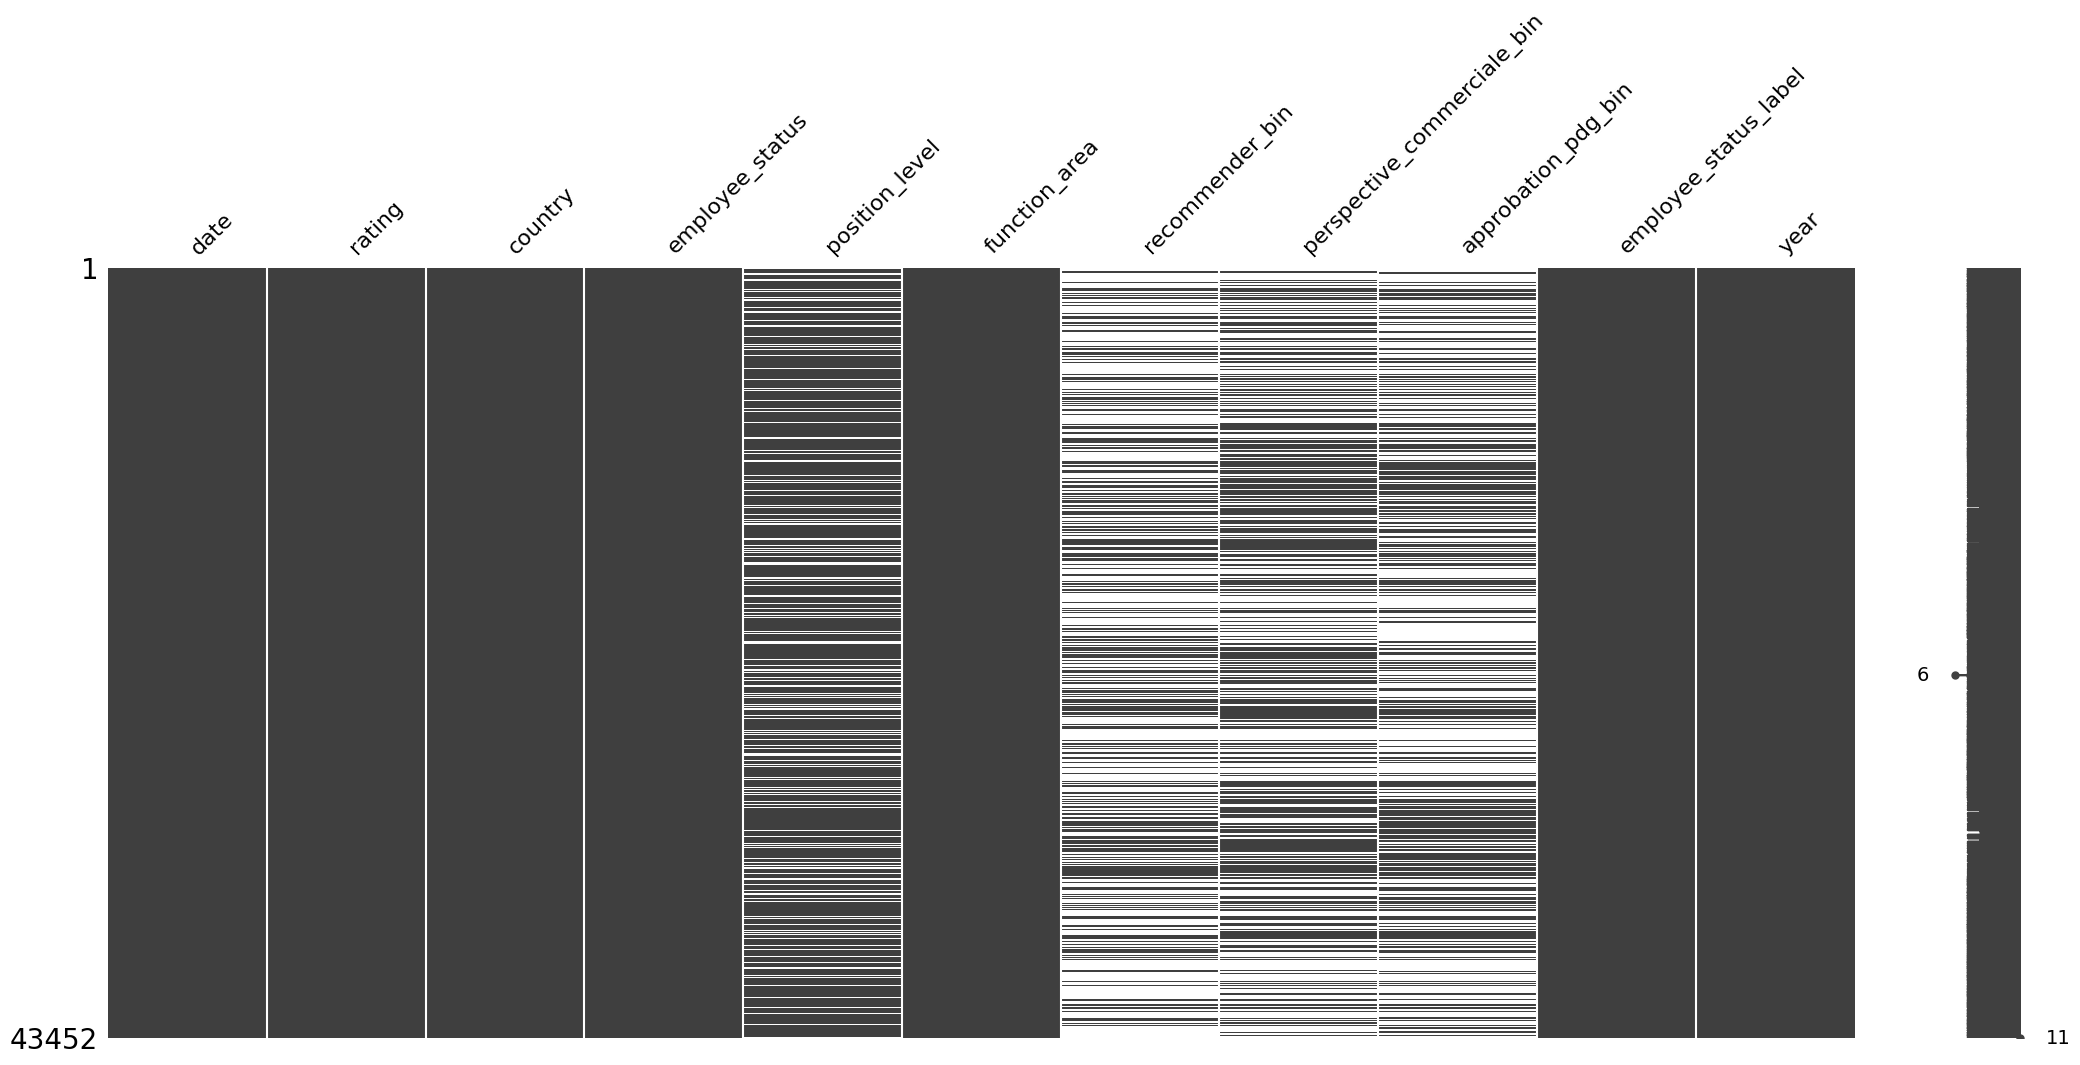

In [252]:
missingno.matrix(copy_df)

### What the matrix shows (quick interpretation)

- Solid columns (almost no gaps): date, rating, position_level, function_area, employee_status → safe for core EDA.

- Some gaps: country → usable, but always report sample size (n) in cuts.

- Many blanks (survey non-responses): recommender_bin, perspective_commerciale, approbation_pdg → this is “no answer”, not an error.

### What we’ll do next

- Quantify missingness per column (% NA) so we can cite exact coverage.

- Do not impute:

1/rating (numeric): analyze rows with rating present (no fill).

2/ Binary KPIs & employee_status: keep NaN as “no answer” (don’t force 0/1).

- Plot-friendly labels: for categoricals with gaps (country, function_area), create temporary *_plot columns filling NaN with "Unknown" only for charts; keep original data with NaN.

- Report both: KPI rate among respondents and response rate per segment (so results aren’t misleading).

- Optionally drop only columns that are non-essential and >70% missing.

## Quantifying the missingness

In [235]:
mv = (copy_df.isna().mean().mul(100).round(1)).sort_values(ascending=False).to_frame('%_missing')
mv


,%_missing
recommender_bin,59.2
approbation_pdg_bin,52.6
perspective_commerciale_bin,46.3
position_level,18.3
date,0.0
employee_status,0.0
country,0.0
rating,0.0
function_area,0.0


KPI columns suffer high non-response (≈59–69% NA); we analyze KPI rates only among respondents and report response coverage. Other variables are complete, so no imputation is needed. All other fields are essentially complete (country 0.1% NA; date/position_level/employee_status/rating/function_area 0.0%). This pattern indicates non-response, not data errors.

## Univariate Analysis

### 1)Average rating (overall, by country, role, status, time).


In [236]:
TOTAL = len(copy_df)

# Overall
print("Overall")
display(pd.DataFrame({
    "n":[TOTAL],
    "% of total":[100.0],
    "avg_rating":[round(copy_df["rating"].mean(), 2)]
}))

# By country (Top 10 by volume)
if "country" in copy_df.columns:
    by_country = (copy_df.groupby("country")["rating"]
                  .agg(n="size", avg_rating="mean").reset_index())
    by_country["% of total"] = (by_country["n"] / TOTAL * 100).round(2)
    by_country["avg_rating"] = by_country["avg_rating"].round(2)
    print("\nBy country (Top 10)")
    display(by_country.sort_values("n", ascending=False)
                      .head(10)[["country","n","% of total","avg_rating"]])

# By role (position_level)
if "position_level" in copy_df.columns:
    by_role = (copy_df.groupby("position_level")["rating"]
               .agg(n="size", avg_rating="mean").reset_index())
    by_role["% of total"] = (by_role["n"] / TOTAL * 100).round(2)
    by_role["avg_rating"] = by_role["avg_rating"].round(2)
    print("\nBy role")
    display(by_role.sort_values("n", ascending=False)
                   [["position_level","n","% of total","avg_rating"]])

# By employee status (0/1 -> labels)
if "employee_status" in copy_df.columns:

    copy_df["employee_status_label"] = copy_df["employee_status"].map(code_to_label).fillna("Unknown")
    by_status = (copy_df.groupby("employee_status_label")["rating"]
                 .agg(n="size", avg_rating="mean").reset_index())
    by_status["% of total"] = (by_status["n"] / TOTAL * 100).round(2)
    by_status["avg_rating"] = by_status["avg_rating"].round(2)
    print("\nBy employee status")
    display(by_status.sort_values("n", ascending=False)
                     [["employee_status_label","n","% of total","avg_rating"]])

# By year
if "date" in copy_df.columns:
    copy_df["year"] = copy_df["date"].dt.year
    by_year = (copy_df.groupby("year")["rating"]
               .agg(n="size", avg_rating="mean").reset_index().sort_values("year"))
    by_year["% of total"] = (by_year["n"] / TOTAL * 100).round(2)
    by_year["avg_rating"] = by_year["avg_rating"].round(2)
    print("\nBy year")
    display(by_year[["year","n","% of total","avg_rating"]])

Overall


,n,% of total,avg_rating
0,43452,100.0,3.83



By country (Top 10)


,country,n,% of total,avg_rating
62,United States,12688,29.20,3.84
22,India,6286,14.47,3.72
61,United Kingdom,4891,11.26,3.87
41,Other,2663,6.13,3.90
49,Singapore,1710,3.94,3.77
20,Hong Kong,1562,3.59,3.56
1,Australia,1522,3.50,3.78
34,Malaysia,1154,2.66,4.13
43,Philippines,699,1.61,3.93
6,China,667,1.54,4.09



By role


/tmp/ipython-input-3489050001.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_role = (copy_df.groupby("position_level")["rating"]


,position_level,n,% of total,avg_rating
1,Associate,15319,35.25,3.77
2,Senior Associate,8366,19.25,3.77
3,Manager,5265,12.12,3.83
0,Intern,3831,8.82,4.22
4,Senior Manager,1429,3.29,3.92
5,Director,1144,2.63,3.89
6,Partner,166,0.38,3.86



By employee status


,employee_status_label,n,% of total,avg_rating
0,Current,26726,61.51,3.91
1,Former,16726,38.49,3.72



By year


,year,n,% of total,avg_rating
0,2008,339,0.78,3.61
1,2009,317,0.73,3.45
2,2010,353,0.81,3.18
3,2011,275,0.63,3.61
4,2012,598,1.38,3.61
5,2013,718,1.65,3.67
6,2014,1027,2.36,3.53
7,2015,1501,3.45,3.70
8,2016,1747,4.02,3.76
9,2017,1817,4.18,3.73


### 2) Histogram — Rating distribution Overall

In [253]:
TOTAL = len(copy_df)

# Overall
print("Overall")
display(pd.DataFrame({ #display helps "display" the dataframe as a table and not just numbers one above the other
    "n":[TOTAL],
    "% of total":[100.0],
    "avg_rating":[round(copy_df["rating"].mean(), 2)]
}))

Overall


,n,% of total,avg_rating
0,43452,100.0,3.83


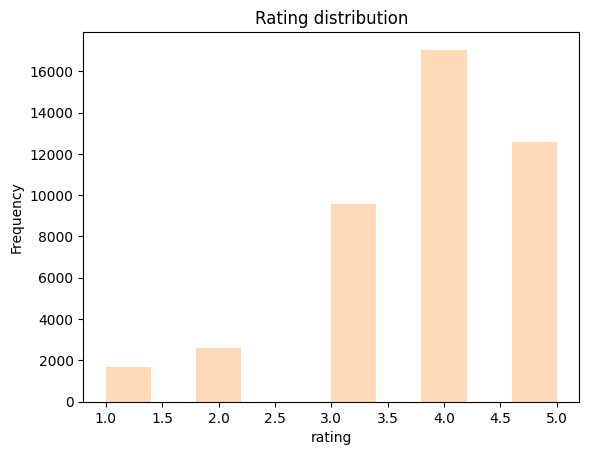

In [254]:
import matplotlib.pyplot as plt

copy_df['rating'].dropna().plot(kind='hist', bins=10, title='Rating distribution', color='peachpuff') # Using peachpuff as a similar color
plt.xlabel('rating'); plt.show()

Ratings are concentrated in the 3.5–4.5 range with a small left tail down to 1. Median sits around ~4, so overall sentiment is rather positive with limited extreme negatives.

## Bivariate Analysis

### Correlation between rating and the CEO approbabation (approbabation du PDG)

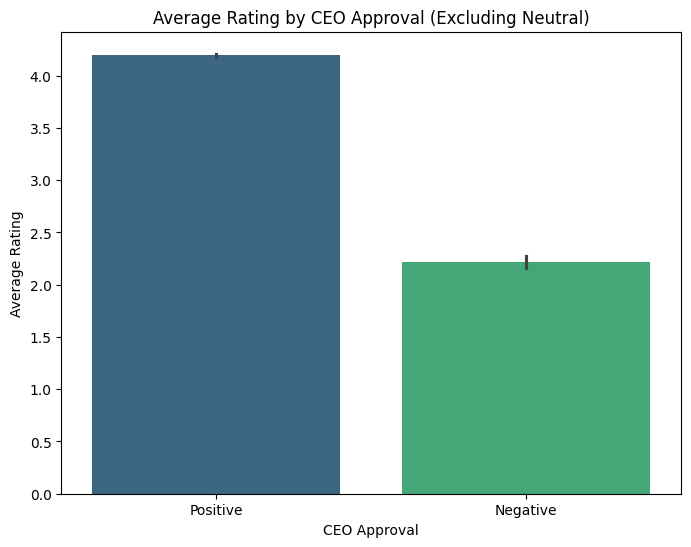

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows where approbation_pdg_bin is NA or 0 (Neutral) for plotting
plot_df = copy_df.dropna(subset=['approbation_pdg_bin']).copy()
plot_df = plot_df[plot_df['approbation_pdg_bin'] != 0].copy()


# Map the binary values back to labels for better readability on the plot
approval_labels = {1: 'Positive', -1: 'Negative'} # Removed Neutral from labels
plot_df['approbation_pdg_label'] = plot_df['approbation_pdg_bin'].map(approval_labels)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='approbation_pdg_label', y='rating', data=plot_df, palette='viridis', hue='approbation_pdg_label', legend=False) # Added hue and legend=False
plt.title('Average Rating by CEO Approval (Excluding Neutral)')
plt.xlabel('CEO Approval')
plt.ylabel('Average Rating')
plt.show()

- Employees who approve of their CEO give an average rating above 4.0, showing strong satisfaction and trust.

- Those with a negative opinion rate around 2.2, a major drop of nearly 2 full points.

- This sharp contrast suggests that leadership perception is a key driver of overall satisfaction.

- Strengthening leadership visibility, communication, and trust could therefore have a strong positive impact on ratings.

### 3) Boxplot — Rating by country (Top 10 by volume)

In [256]:
# -----------------------------
# A) By country (Top 10) — EXCLUDING "Other" + NaN
# -----------------------------
mask = copy_df['country'].notna() & (copy_df['country'] != 'Other')

by_country_no_other = (
    copy_df.loc[mask]
           .groupby('country', observed=True)['rating']
           .agg(n='size', avg_rating='mean')
           .reset_index()
)

TOTAL_VALID = by_country_no_other['n'].sum()
by_country_no_other['% of total'] = (by_country_no_other['n'] / TOTAL_VALID * 100).round(2)
by_country_no_other['avg_rating'] = by_country_no_other['avg_rating'].round(2)

print("\nBy country (Top 10) — excluding 'Other'")
display(
    by_country_no_other.sort_values('n', ascending=False)
                       .head(10)[['country','n','% of total','avg_rating']])


By country (Top 10) — excluding 'Other'


,country,n,% of total,avg_rating
61,United States,12688,31.11,3.84
22,India,6286,15.41,3.72
60,United Kingdom,4891,11.99,3.87
48,Singapore,1710,4.19,3.77
20,Hong Kong,1562,3.83,3.56
1,Australia,1522,3.73,3.78
34,Malaysia,1154,2.83,4.13
42,Philippines,699,1.71,3.93
6,China,667,1.64,4.09
24,Ireland,651,1.60,3.89


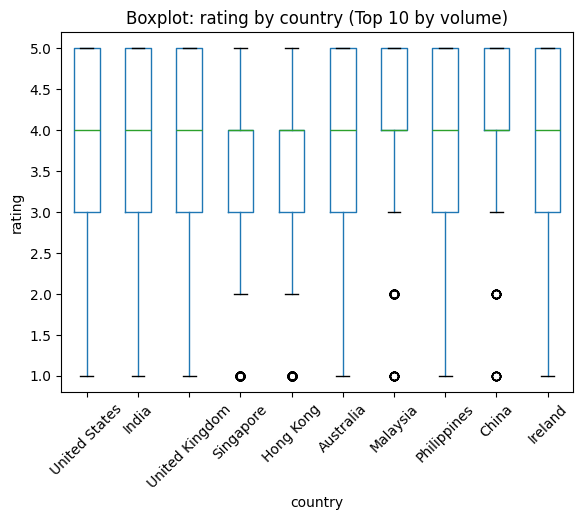

In [241]:
top10_order = (by_country_no_other
               .sort_values('n', ascending=False)
               .head(10)['country'].tolist())

tmp = (copy_df
       .loc[mask & copy_df['country'].isin(top10_order), ['rating','country']] ##keeps only rows that have both a rating and a country.
       .dropna(subset=['rating']) ###Filters to the Top-10 countries only
       .copy())

# lock the x-axis order to the table order
tmp['country'] = pd.Categorical(tmp['country'], categories=top10_order, ordered=True) ##Without this, boxplots default to alphabetical order, and we want tht top 10 by volume

ax = tmp.boxplot(column='rating', by='country', grid=False)
plt.title('Boxplot: rating by country (Top 10 by volume)')
plt.suptitle('')
plt.xlabel('country'); plt.ylabel('rating')
plt.xticks(rotation=45)
plt.show()

#### Global Overview

We started by analyzing the global distribution of ratings across all countries.
The average global score is 3.83/5, with most reviews between 4 and 5 stars.
However, the presence of several countries with average ratings below 3.6 indicates potential dissatisfaction zones.

### 4) Bottom 10 countries by rating (n ≥ 50)

Lowest countries by average rating (n ≥ 50):


,n,rating_mean
country,,
Israel,122,3.540984
Hong Kong,1562,3.560819
Argentina,80,3.587500
Greece,235,3.591489
Colombia,40,3.600000
Bahrain,13,3.615385
Switzerland,248,3.616935
Chile,24,3.625000
Mauritius,32,3.625000


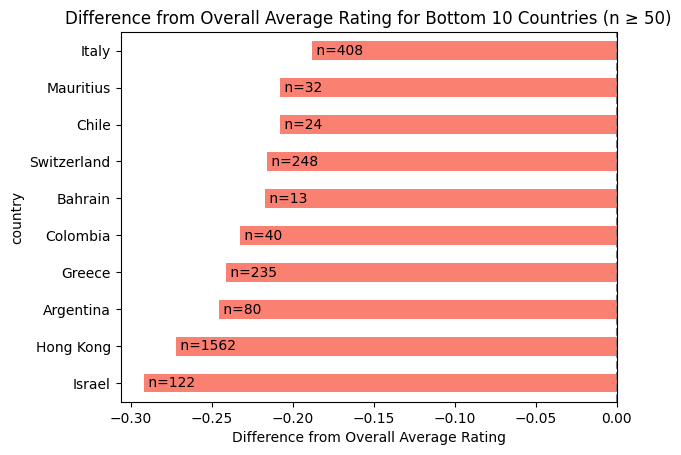

In [257]:
MIN_N = 50
by_country = (copy_df.dropna(subset=['rating','country'])
              .groupby('country')
              .agg(n=('rating','size'), rating_mean=('rating','mean'))
              .sort_values('rating_mean'))

print("Lowest countries by average rating (n ≥ 50):")
display(by_country.head(10))

# Calculate the difference from the overall average
overall_avg_rating = copy_df['rating'].mean()
by_country['rating_diff_from_overall'] = by_country['rating_mean'] - overall_avg_rating

ax = by_country.head(10)['rating_diff_from_overall'].plot(kind='barh',
    title='Difference from Overall Average Rating for Bottom 10 Countries (n ≥ 50)',
    color='salmon') # Use a color that indicates lower values

plt.xlabel('Difference from Overall Average Rating')
# Add a vertical line at 0 to indicate the overall average
plt.axvline(0, color='grey', linestyle='--')

# Add the number of reviews (n) to each bar
for i, v in enumerate(by_country.head(10)['rating_diff_from_overall']):
    ax.text(v, i, f' n={by_country.head(10)["n"].iloc[i]}', va='center')


plt.show()

In [258]:
copy_df

,date,rating,country,employee_status,position_level,function_area,recommender_bin,perspective_commerciale_bin,approbation_pdg_bin,employee_status_label,year
0,2022-04-19,2.0,Australia,0,NaN,Other,-1,<NA>,<NA>,Former,2022
1,2021-12-29,3.0,Pakistan,0,Associate,Consulting–Advisory,1,-1,1,Former,2021
2,2022-03-29,4.0,Singapore,1,Director,Other,<NA>,<NA>,<NA>,Current,2022
3,2022-04-12,4.0,Ireland,1,Senior Manager,Tech–IT–Data,<NA>,<NA>,<NA>,Current,2022
4,2022-04-12,5.0,Malaysia,1,Senior Manager,Other,<NA>,<NA>,<NA>,Current,2022
...,...,...,...,...,...,...,...,...,...,...,...
43447,2023-02-20,4.0,United States,0,Associate,Tech–IT–Data,<NA>,<NA>,<NA>,Former,2023
43448,2023-02-21,5.0,Indonesia,0,Associate,Audit–Assurance,1,1,1,Former,2023
43449,2023-02-21,4.0,Singapore,1,Associate,Other,<NA>,<NA>,<NA>,Current,2023
43450,2023-02-28,3.0,United States,1,Senior Associate,Other,<NA>,<NA>,<NA>,Current,2023


### 5)  Average rating by employee status

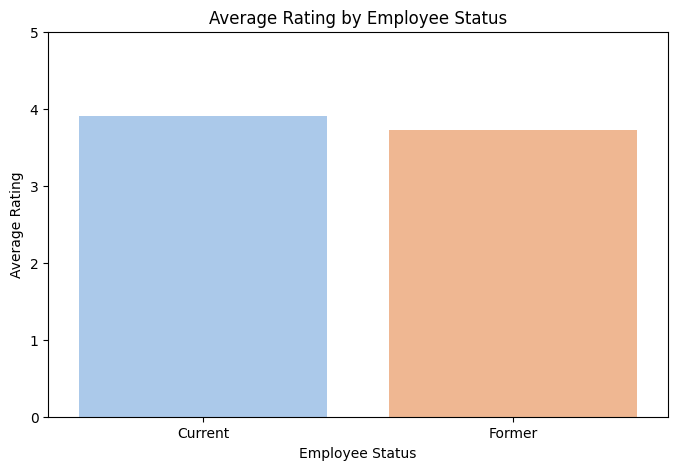

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='employee_status_label', y='avg_rating', data=by_status, palette='pastel', hue='employee_status_label', legend=False)
plt.title('Average Rating by Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Average Rating')
plt.ylim(0, 5) # Ensure y-axis starts from 0 for fair comparison of ratings
plt.show()

### 6) average rating by position level




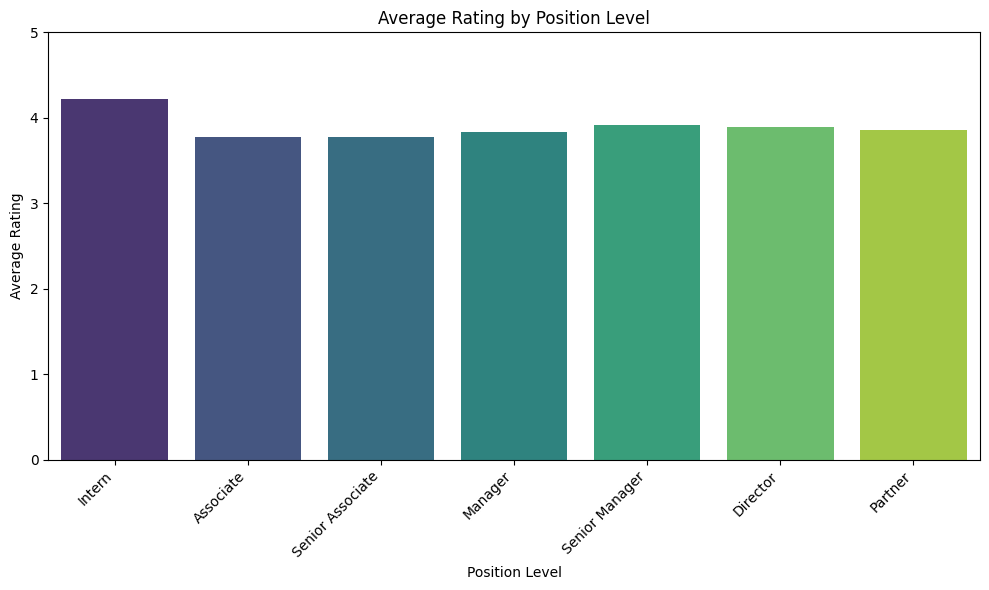

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='position_level', y='avg_rating', data=by_role, palette='viridis', hue='position_level', legend=False)
plt.title('Average Rating by Position Level')
plt.xlabel('Position Level')
plt.ylabel('Average Rating')
plt.ylim(0, 5) # Ensure y-axis starts from 0 for fair comparison of ratings
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### 7) Average rating by function area

In [259]:
by_function_area = (
    copy_df.groupby('function_area')['rating']
    .mean()
    .reset_index()
    .rename(columns={'rating': 'avg_rating'})
)
display(by_function_area)

,function_area,avg_rating
0,Audit–Assurance,3.831999
1,Consulting–Advisory,3.811373
2,Deals–Transactions,3.994340
3,Other,3.835943
4,Risk,3.803987
5,Support (HR/Ops/Finance),3.868613
6,Tax,3.824698
7,Tech–IT–Data,3.772470


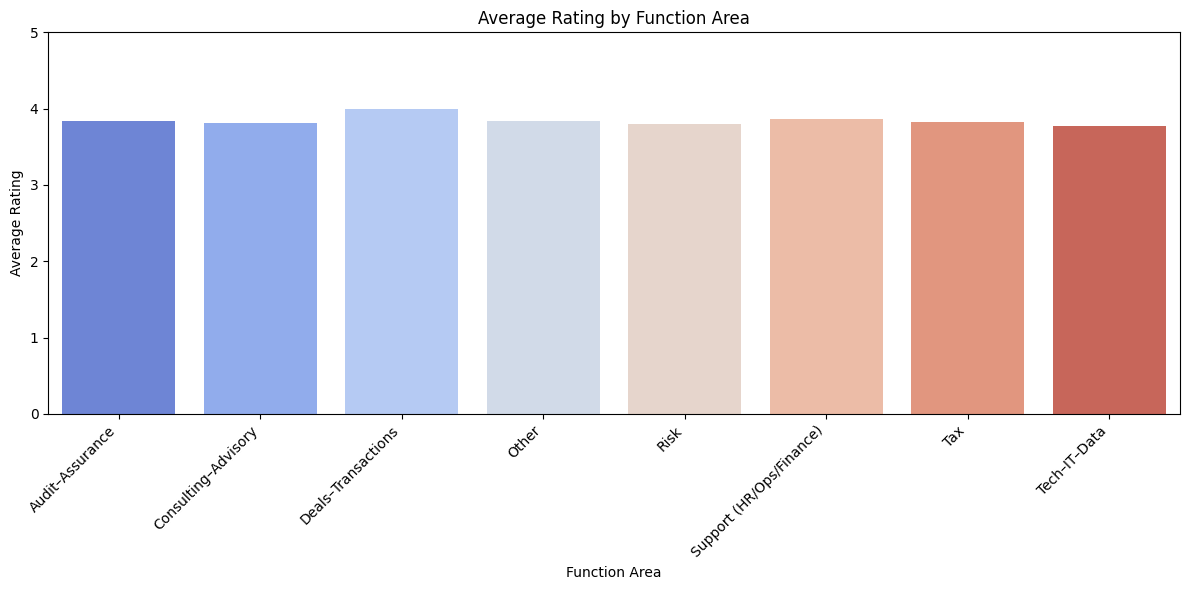

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='function_area', y='avg_rating', data=by_function_area, palette='coolwarm', hue='function_area', legend=False)
plt.title('Average Rating by Function Area')
plt.xlabel('Function Area')
plt.ylabel('Average Rating')
plt.ylim(0, 5) # Ensure y-axis starts from 0 for fair comparison of ratings
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Employee Status:** Differences in average ratings exist between employee statuses (e.g., full-time, part-time, contract), indicating varying satisfaction levels among these groups.
*   **Position Level:** Average ratings show variations across different position levels (e.g., entry-level, senior management), suggesting that hierarchical standing may influence overall job satisfaction.
*   **Function Area:** There are distinct differences in average ratings across various functional areas (e.g., Engineering, Sales, Marketing), highlighting that job roles and departments might have unique factors affecting employee satisfaction.
*   **Year-over-Year Trends:** The analysis of average ratings by year reveals trends, indicating whether overall employee satisfaction is improving, declining, or remaining stable over time.
*   **Overall Rating Distribution:** The distribution of overall ratings provides a comprehensive view of employee sentiment, showing if ratings are generally high, low, or polarized across the employee base.
*   **CEO Approval Correlation:** There is an observable relationship between average employee ratings and CEO approval, which helps understand how leadership perception aligns with overall job satisfaction.
*   **Country-Level Satisfaction:** Significant variations in average ratings are noted across different countries, suggesting that geographical and cultural factors could play a role in employee satisfaction.

### Insights or Next Steps

*   Investigate the underlying reasons for lower average ratings in specific employee statuses, position levels, function areas, or countries to formulate targeted improvement strategies.
*   Delve deeper into the observed year-over-year rating trends to identify specific events or policy changes that might have influenced employee satisfaction.


In [263]:
from google.colab import files
files.download("pwc_cleaned_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>